# Project: Wrangling and Analyze Data

## Introduction

 **"WeRateDogs"** Twitter archive contains basic tweet data for all 5000+ of their tweets which have been filtered and enclosed in twitter_wnhance_archive csv file forming the basis of the analysis. The goal is to gather, assess,clean,analyse and visualise the dataset.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter_archive=pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [5]:
file_images = url.split('/')[-1]
with open(file_images,mode='wb') as file:
    file.write(response.content)

In [6]:
df_image_predictions=pd.read_csv(file_images,sep='\t')

In [7]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
'''consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)'''

"consumer_key = 'CONSUMER_KEY'\nconsumer_secret = 'CONSUMER_SECRET'\naccess_token = 'ACCESS_TOKEN'\naccess_secret = 'ACCESS_SECRET'\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)"

In [9]:
'''# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

df_list = []
with open('tweet_json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON data line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
df_tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
df_tweet_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Now we have 3 datasets after gathering i.e., df_twitter_archive,df_image_predictions and df_tweet_data.
First,let's perform visual assessment.

In [12]:
df_twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
df_tweet_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467



Here are my observations from the visual assessment and info() from gather section:

df_twitter_archive: This dataframe is not tidy, specifically with the dog stages.We can group all those columns into a single column and drop the rest of columns to make it tidy.There are missing values in in_reply_to_status_id ,        
in_reply_to_user_id, retweeted columns,Nan in name column and change the tweet_id datatype to object and timestamp datatype to datetime.

df_image_predictions: The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.

df_tweet_data: This doesn't require a separate table and has to be joined on 'tweet_id'.


Now, let's do programmatic assessment.

In [15]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Buddy          7
Bailey         7
Toby           7
an             7
Rusty          6
Dave           6
Oscar          6
Scout          6
Koda           6
Leo            6
Bella          6
Jack           6
Stanley        6
Milo           6
Jax            6
Louis          5
            ... 
Mack           1
Stuart         1
Hubertson      1
Berkeley       1
Akumi          1
Jersey         1
Brady          1
Darla          1
Mo             1
Marlee         1
Lassie         1
Karll          1
Danny          1
Ozzie          1
Obi            1
Godzilla       1
his            1
Rueben         1
Ruffles        1
Laika          1
Tupawc         1
Dylan          1
Tayzie         1
Huck           1
Bubba          1
Tripp          1
Tyrus          1
Ralphy        

Missing Nan values and names having a,an,Bo are like part of the name.

In [16]:
# list all names that are NOT completed
errors_mask = df_twitter_archive.name.str.contains('^[a-z]', regex = True)
df_twitter_archive[errors_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [17]:
len(df_twitter_archive[errors_mask])

109

There are total 109 errors which are not names.

In [18]:
doggo = df_twitter_archive.doggo.value_counts()
floofer = df_twitter_archive.floofer.value_counts()
pupper = df_twitter_archive.pupper.value_counts()
puppo = df_twitter_archive.puppo.value_counts()
print(doggo); 
print(floofer); 
print(pupper); 
print(puppo)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


Missing information for the dog stages.

In [19]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

There are only 4 types of sources and can be particularly specified eliminating the entire url.

In [20]:
all_columns=pd.Series(list(df_twitter_archive)+list(df_image_predictions)+list(df_tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [21]:
df_twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The max of both the parameters is so large and min is 0 for both.

In [22]:
df_twitter_archive[df_twitter_archive.rating_denominator==10].rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [23]:
p1_dog= df_image_predictions.p1_dog.value_counts()
p2_dog = df_image_predictions.p2_dog.value_counts()
p3_dog = df_image_predictions.p3_dog.value_counts()
print(p1_dog); 
print(p2_dog); 
print(p3_dog)

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [24]:
df_image_predictions[~df_image_predictions.p1_dog & \
               ~df_image_predictions.p2_dog & \
               ~df_image_predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head()

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False


In [25]:
sum(~df_image_predictions.p1_dog & \
               ~df_image_predictions.p2_dog & \
               ~df_image_predictions.p3_dog)

324

We have to change the datatype of p1_dog,p2_dog and p3_dog to object,remove 324 non dog breeds and introduce two new columns for breed and confidence combinining the data from the above 6 columns to merge with the df_twitter_archive table.

### Quality issues
#### Twitter_Archive
1. There are 181 retweets and 78 reply tweets which need to be removed as the key points focus on original tweet ratings and no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_status_id ,in_reply_to_user_id.

2. We need to change tweet_id datatype to object and timestamp datatype to datetime.

3. Missing Nan values(too many names to verify and will not be cleaned) and 109 names having a,an,Bo are like part of the name which are not real names and need to be replaced with none.

4. The max of 'rating_numerator' is so large and so we have to clean the data with rating numerator <=15.

5. The value of 'rating_denominator'are greater than 10 which is not possible ,so we have to clean the data with rating_denominator not equal to 10

6. There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>".
#### Image_predictions

7. We have to change the datatype of tweet_id column to object instead of int64.

8. The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.


### Tidiness issues
1.  Twitter_archive dataframe is not tidy, specifically with the dog stages.We can group all those columns into a single column and drop the rest of columns to make it tidy.

2. In image_predictions dataframe,we need to remove 324 non dog breeds and introduce two new columns for breed and confidence to merge with the twitter_archive dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
df_twitter_archive_clean= df_twitter_archive.copy()
df_image_predictions_clean= df_image_predictions.copy()
df_tweet_data_clean=df_tweet_data.copy()


In [27]:
df_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [28]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_data_clean, 
                         on = 'tweet_id', how = 'left')

###  Quality Issue #1:
There are 181 retweets and 78 reply tweets in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_status_id ,in_reply_to_user_id.

#### Define: 
**We need to drop all the retweet and reply columns where the rows are non null values.**

#### Code

In [29]:
df_twitter_archive_clean=df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isna()]

In [30]:
df_twitter_archive_clean=df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isna()]

In [31]:
df_twitter_archive_clean=df_twitter_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#### Test

In [32]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


In [33]:
df_twitter_archive.shape[0]-df_twitter_archive_clean.shape[0]

259

So, a total of (181+78=259) retweet and reply tweets are deleted.

### Quality Issue #2:
 Change tweet_id datatype to object and timestamp datatype to datetime.

#### Define

**Convert datatypes of tweet_id and timestamp to object and datetime respectively.**

#### Code

In [34]:
df_twitter_archive_clean['tweet_id']=df_twitter_archive_clean['tweet_id'].astype('str')
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])


#### Test

In [35]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 245.7+ KB


### Quality Issue #3:

There are 109 names having a,an,Bo are like part of the name which are not real names and need to be replaced with none.

#### Define

**Use str.replace() function to replace all lowercase names with 'none'**

#### Code

In [36]:
errors_mask = df_twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
df_twitter_archive_clean[errors_mask].name.value_counts().sort_index()



a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [37]:
df_twitter_archive_clean[errors_mask].name.value_counts().sort_index().sum()

104

In [38]:
df_twitter_archive_clean.loc[errors_mask,'name']='none'

#### Test

In [39]:
df_twitter_archive_clean[errors_mask].name.value_counts().sort_index()

none    104
Name: name, dtype: int64

### Quality Issue #4:

The max of 'rating_numerator' is so large.

#### Define

**We have to drop the rows with rating numerator <=15.**

#### Code

In [40]:
df_twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
420       1
204       1
165       1
144       1
121       1
99        1
88        1
84        1
80        1
75        1
60        1
50        1
45        1
44        1
27        1
26        1
24        1
14       38
13      287
12      486
11      413
10      436
9       153
8        98
7        52
6        32
5        34
4        16
3        19
2         9
1         5
0         1
Name: rating_numerator, dtype: int64

In [41]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_numerator<15]

#### Test

In [42]:
df_twitter_archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

### Quality Issue #5:

The value of 'rating_denominator'are greater than 10 which is not possible.

#### Define

**We have to drop the rows with rating_denominator not equal to 10.**

#### Code

In [43]:
df_twitter_archive_clean.rating_denominator.value_counts()

10    2075
11       2
20       1
2        1
Name: rating_denominator, dtype: int64

In [44]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator == 10]

#### Test

In [45]:
df_twitter_archive_clean.rating_denominator.value_counts()

10    2075
Name: rating_denominator, dtype: int64

### Quality Issue #6:

There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>"

#### Define

**Extract the display portion of the string with the source string.**

#### Code

In [46]:
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [47]:
df_twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1943
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### Quality Issue #7:

We have to change the datatype of tweet_id column should be object instead of int64.


#### Define

**Use .astype() function to convert datatypes.**

#### Code

In [48]:
df_image_predictions_clean['tweet_id']=df_image_predictions_clean['tweet_id'].astype('str')


In [49]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality Issue #8:

The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.

#### Define

**Use str.lower() function to bring uniformity in the breeds of dogs.**

#### Code

In [50]:
df_image_predictions_clean['p1']=df_image_predictions_clean['p1'].str.lower()
df_image_predictions_clean['p2']=df_image_predictions_clean['p2'].str.lower()
df_image_predictions_clean['p3']=df_image_predictions_clean['p3'].str.lower()

#### Test

In [51]:
df_image_predictions_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


### Tidiness Issue #1:
Twitter_archive dataframe is not tidy, specifically with the dog stages.We can group all those columns into a single column and drop the rest of columns to make it tidy.

#### Define

**We have to create a single dog stage column and remove the rest 4 columns .**

#### Code

In [52]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2072 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
retweet_count         2075 non-null float64
favorite_count        2075 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 243.2+ KB


In [53]:
df_twitter_archive_clean['stage']='None'
df_twitter_archive_clean['stage']=df_twitter_archive_clean['doggo']+df_twitter_archive_clean['floofer']+df_twitter_archive_clean['pupper']+df_twitter_archive_clean['puppo']
df_twitter_archive_clean['stage'].value_counts()          

NoneNoneNoneNone        1740
NoneNonepupperNone       220
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [54]:
# Remove the None from the above values
df_twitter_archive_clean['stage']=df_twitter_archive_clean['stage'].str.replace('None','')
df_twitter_archive_clean['stage'].value_counts() 

                1740
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

We have 2 dog stages in same column i.e., doggopupper and doggofloofer so let's add a comma between them to separate.

In [55]:
df_twitter_archive_clean['stage']=df_twitter_archive_clean['stage'].str.replace('doggofloofer','doggo,floofer')

In [56]:
df_twitter_archive_clean['stage']=df_twitter_archive_clean['stage'].str.replace('doggopuppo','doggo,puppo')

In [57]:
df_twitter_archive_clean=df_twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df_twitter_archive_clean=df_twitter_archive_clean[df_twitter_archive_clean.stage!='']

#### Test

In [58]:
df_twitter_archive_clean['stage'].value_counts() 

pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

In [59]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7711.0,32467.0,doggo
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,8538.0,38818.0,puppo
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,2321.0,15359.0,puppo
29,886366144734445568,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,3316.0,21524.0,pupper
43,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,3128.0,20771.0,doggo


In [60]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 9 to 2017
Data columns (total 11 columns):
tweet_id              335 non-null object
timestamp             335 non-null datetime64[ns]
source                335 non-null object
text                  335 non-null object
expanded_urls         334 non-null object
rating_numerator      335 non-null int64
rating_denominator    335 non-null int64
name                  335 non-null object
retweet_count         335 non-null float64
favorite_count        335 non-null float64
stage                 335 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 31.4+ KB


### Tidiness Issue #2:

In image_predictions dataframe,we need to remove 324 non dog breeds and introduce two new columns for breed and confidence to merge with the twitter_archive dataframe.

#### Define

**This is a 2-step process, first creating 2 columns in the predictions table, then merging to twitter_archive.**

#### Code

In [61]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [62]:

# setup the conditions for dog_breed
conditions = [(df_image_predictions_clean['p1_dog']),
              (df_image_predictions_clean['p2_dog']),
              (df_image_predictions_clean['p3_dog'])]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [df_image_predictions_clean['p1'], 
                 df_image_predictions_clean['p2'],
                 df_image_predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [df_image_predictions_clean['p1_conf'], 
                      df_image_predictions_clean['p2_conf'], 
                      df_image_predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
df_image_predictions_clean['breed'] = np.select(conditions, choices_breed)

# select the predicted confidence level based on the first successful condition
df_image_predictions_clean['confidence'] = np.select(conditions, choices_confidence)
                                           

In [63]:
mask_columns=['tweet_id','breed','confidence']
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_predictions_clean[mask_columns],
                         on = 'tweet_id', how = 'inner')

#### Test

In [64]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311


In [65]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,breed,confidence
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7711.0,32467.0,doggo,pembroke,0.511319
1,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,8538.0,38818.0,puppo,pembroke,0.966327
2,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,2321.0,15359.0,puppo,golden_retriever,0.953442
3,886366144734445568,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,3316.0,21524.0,pupper,french_bulldog,0.999201
4,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,3128.0,20771.0,doggo,german_shepherd,0.707046


In [66]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 301
Data columns (total 13 columns):
tweet_id              302 non-null object
timestamp             302 non-null datetime64[ns]
source                302 non-null object
text                  302 non-null object
expanded_urls         302 non-null object
rating_numerator      302 non-null int64
rating_denominator    302 non-null int64
name                  302 non-null object
retweet_count         302 non-null float64
favorite_count        302 non-null float64
stage                 302 non-null object
breed                 302 non-null object
confidence            302 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 33.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [68]:
df_wrangled=pd.read_csv('twitter_archive_master.csv')

## 1) The dog breed with highest number of favorite tweets

In [69]:
df_wrangled.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,breed,confidence
51,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,48265.0,132810.0,puppo,lakeland_terrier,0.196015
132,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,79515.0,131075.0,doggo,labrador_retriever,0.825333
18,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,32883.0,106827.0,pupper,french_bulldog,0.905334
59,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,42228.0,95450.0,doggo,standard_poodle,0.351308
141,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,52360.0,75163.0,doggo,eskimo_dog,0.503372


Lakeland_terrier received highest number of favourite tweets.

## 2) The dog breed with highest number of  retweets

In [70]:
df_wrangled.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,breed,confidence
132,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,79515.0,131075.0,doggo,labrador_retriever,0.825333
141,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,52360.0,75163.0,doggo,eskimo_dog,0.503372
51,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,48265.0,132810.0,puppo,lakeland_terrier,0.196015
59,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,42228.0,95450.0,doggo,standard_poodle,0.351308
18,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,32883.0,106827.0,pupper,french_bulldog,0.905334


Labrador_retriever received highest number of retweets.

 ## 3) Percentage of tweets with ratings>=10

In [71]:
total_ratings = sum(df_wrangled.rating_numerator >= 10)
percentage_ratings = (total_ratings / df_wrangled.shape[0])*100

In [72]:
percentage_ratings

85.43046357615894

### Insights:
1. Lakeland_terrier received highest number of favourite tweets.

2. Labrador_retriever received highest number of retweets.

3. There are 85.43% tweets having ratings >=10.

### Visualization

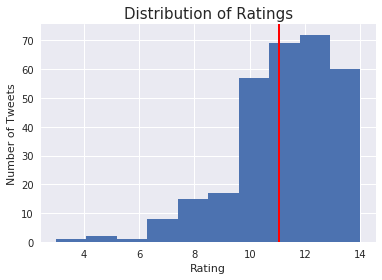

In [73]:
df_wrangled['rating_numerator'].plot(kind='hist')
plt.ylabel('Number of Tweets', fontsize = 11)
plt.xlabel('Rating', fontsize = 11)
plt.title('Distribution of Ratings', fontsize = 15)
plt.axvline(df_wrangled['rating_numerator'].mean(),color='red',linewidth=2)
sns.set_style("darkgrid")
plt.show();

### Conclusion
**From the above graph, we can say that it is a left skewed distribution and high number of tweets got ratings between 10-14**